# Problem 2: Logistic Regression and LDA

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.


### Data Dictionary:

## Variable Name Description

Holiday_Package	  -  Opted for Holiday Package yes/no?

Salary	          -  Employee salary

age               -  Age in years

edu               -   Years of formal education

no_young_children -  The number of young children (younger than 7 years)

no_older_children -  Number of older children

foreign           -  foreigner Yes/No

## Problem Statement: 

### Help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
hp = pd.read_csv('Holiday_Package.csv').drop('Unnamed: 0',axis=1)
hp.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


The dataset contents 872 observations across 8 columns in total. The first column is just a label and will not be used in the analysis. Hence, we have droped it when loading the dataset. So, we remain with 7 columns to perform regression.

In [3]:
hp.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [4]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [5]:
hp.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

There are 5 continuous and 1 categorical variable of binary type apart from target variable of 'holliday_Package' which is also a binary type categorical variable. We will correct the spelling of our target variable to Holiday_package for further analysis. There are no missing values in the dataset as well. 

In [7]:
hp.rename(columns={'Holliday_Package': 'Holiday_package'}, inplace=True)
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [17]:
hp.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


We can see that Salary variable is having some difference between the mean and median due to which it can appear to be rightly skewed and also it looks to contain outliers and so does years of education. Rest of the data is observed to have almost similar mean and median values without any outliers which we will further evaluate during our analysis. There are max 3 children below age of 7 years and 6 older than 7 years and 25% of the employees are yet to have any children. 

## Check for Duplicate records

In [9]:
dups = hp.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

hp[dups]

Number of duplicate rows = 0


,Holiday_package,Salary,age,educ,no_young_children,no_older_children,foreign


There are no duplicate records in the dataset.

In [10]:
columns= hp.select_dtypes(include='object').columns
for i in columns:
    print('\n')
    print ("---- {} ----".format(i))
    print(pd.DataFrame([hp[i].value_counts(),
                       round(hp[i].value_counts()/hp.shape[0]*100,2)],index=['Count','Percent']).T)
    print('\n')
        



---- Holiday_package ----
     Count  Percent
no   471.0    54.01
yes  401.0    45.99




---- foreign ----
     Count  Percent
no   656.0    75.23
yes  216.0    24.77




The class is divided as such where in the response variable of 'Holiday-package' the class of interest is 54% and the other class is of 46%. Hence, we can confirm that there is no class imbalance in the data. 

Also, the employees who have been to foreign are only 25% whereas about 75% are yet to travel overseas which seems like a good opportunity for the employer. 

<AxesSubplot:xlabel='no_older_children'>

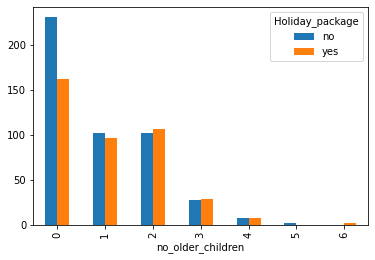

In [22]:
pd.crosstab(hp.no_older_children,hp.Holiday_package).plot(kind='bar')

As we can see with increasing age of children the chances to take a holiday decreases especially beyond 2 children. Also, the magnitude of taking a holiday drastically reduces when we move from 0 child older than 7 years to 1 child and beyond.

<AxesSubplot:xlabel='no_young_children'>

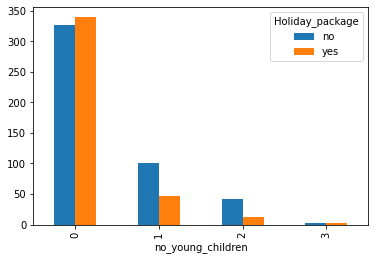

In [23]:
pd.crosstab(hp.no_young_children,hp.Holiday_package).plot(kind='bar')

There is not much difference for preference of holiday for 0 child as yes and no are almost the same. Again similar to no_older_children, here too the magnitude drastically reduces when we move from 0 to 1 child and beyond.

## Univariate Analysis

In [19]:
# Treating outliers for continuous variables 
cont = hp.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cont.columns.values)
len(lstnumericcolumns)

5

Salary
Skew: 3.1


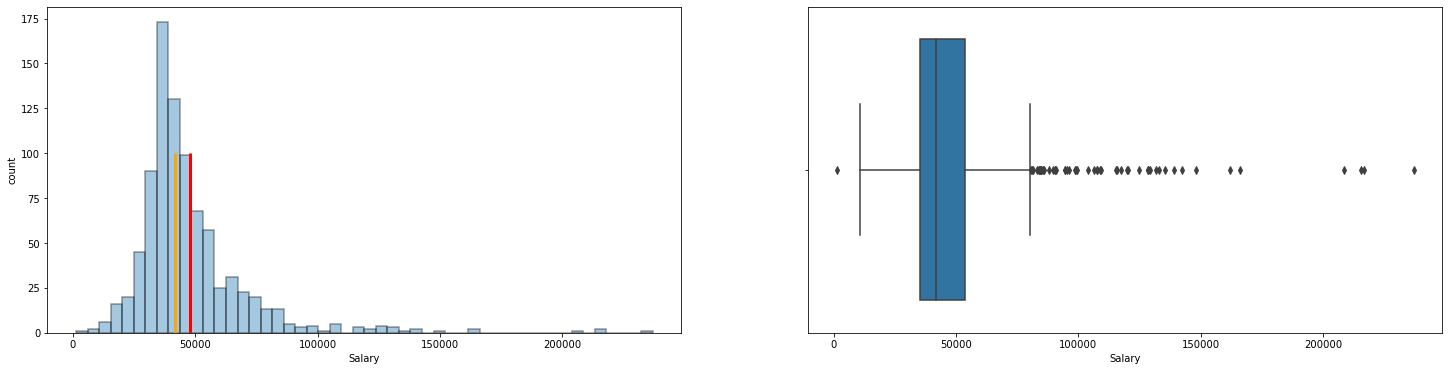

age
Skew: 0.15


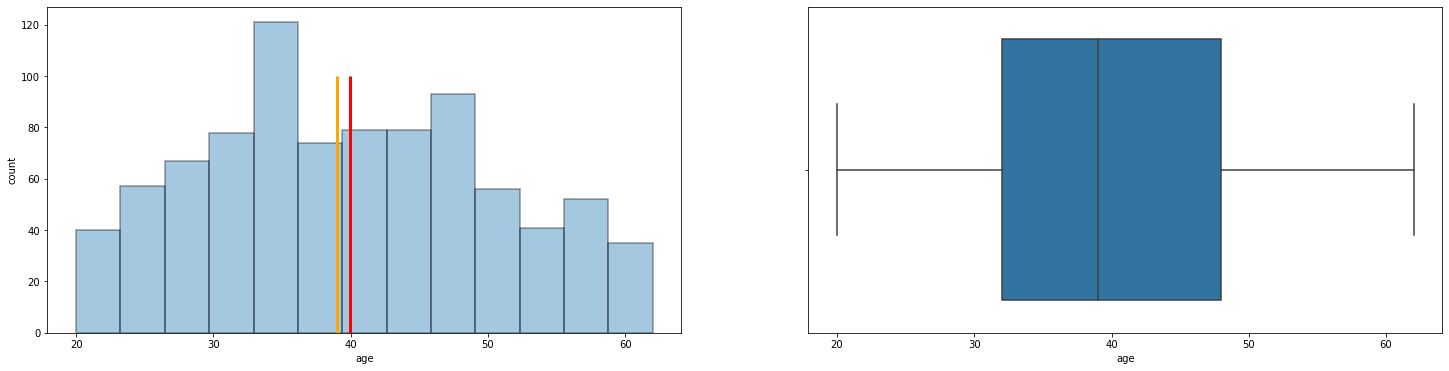

educ
Skew: -0.05


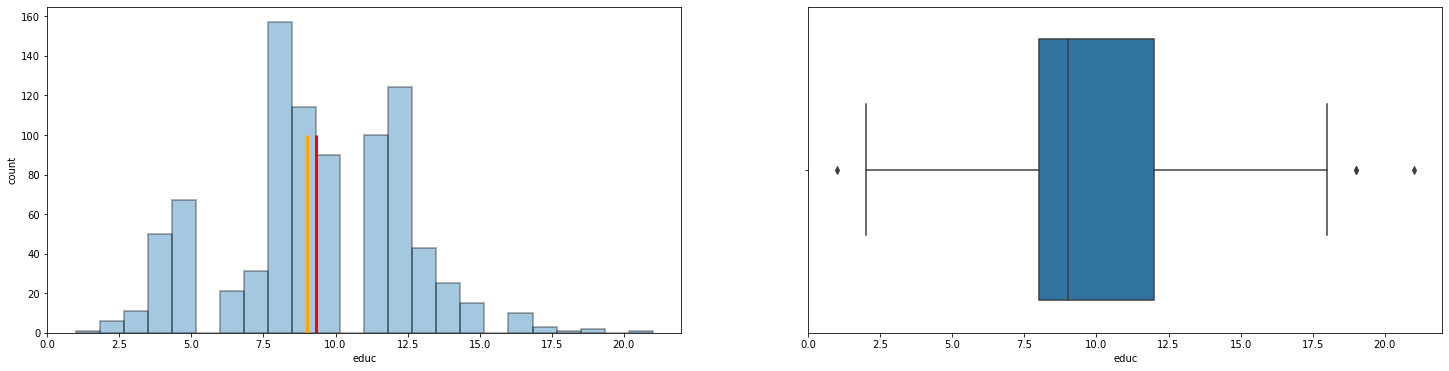

no_young_children
Skew: 1.95


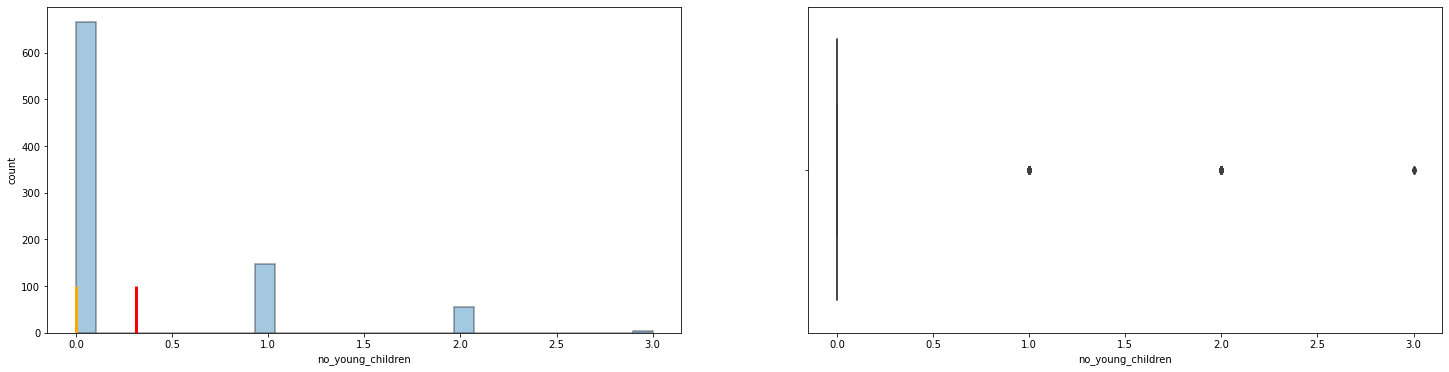

no_older_children
Skew: 0.95


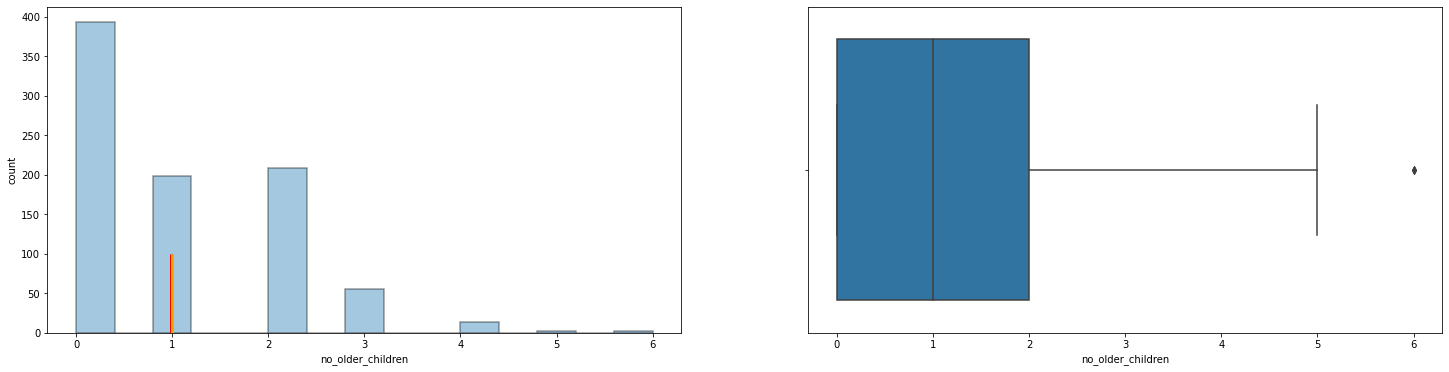

In [21]:
cont = hp.select_dtypes(include = ['float64', 'int64'])
cols = list(cont.columns)
for col in cols:
    print(col)
    print('Skew:', np.round(hp[col].skew(),2)) 
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(hp[col],norm_hist=False,kde=False,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(hp[col].mean(),ymin=0, ymax=100, color = 'red', linewidth=3)
    plt.vlines(hp[col].median(),ymin=0, ymax=100, color = 'orange', linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(hp[col])
    plt.show()

From above it can be seen clearly that Salary variable is rightly skewed and contains outliers. Also, both variables for no of children can also be seen to be right skewed and containing outliers. Variables of age and educ are near normally distributed with only age being the variable without any outlier. However, even though there is a presence of outliers as per dataset, they seem to be justifiable and hence, we will not treat the outliers for this case as of now. 

## Bivariate Analysis

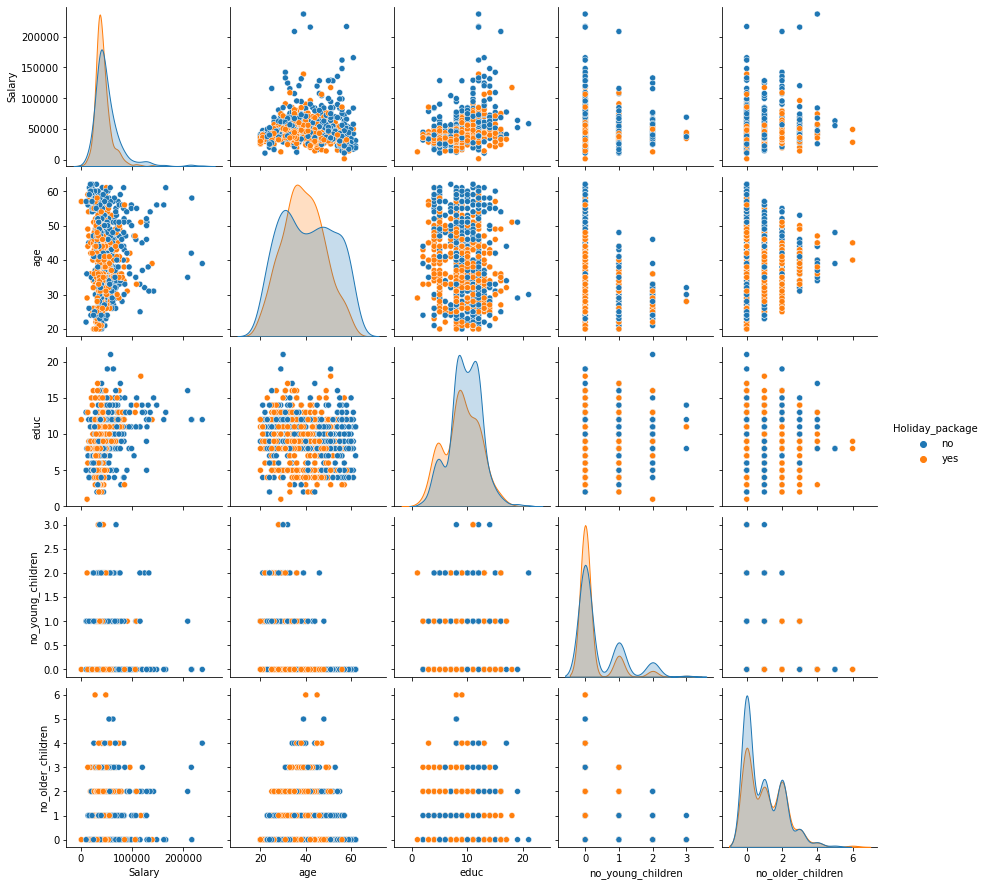

In [24]:
sns.pairplot(hp, hue='Holiday_package', diag_kind='kde')

For the diagonals above we can observe that the classes are overlapping each other ie, they are not well seperated and thus the dataset may not prove to have enough good predictors for the model and an overall high f score as well. Also, there are a few peaks in educ, no_young_children and no_older_children which could be appearing due to the outliers present in the data. Let us further check on the correlation of the independent variables as from the above figure it does not seem to have any strong correlations among them. 

## Correlation 

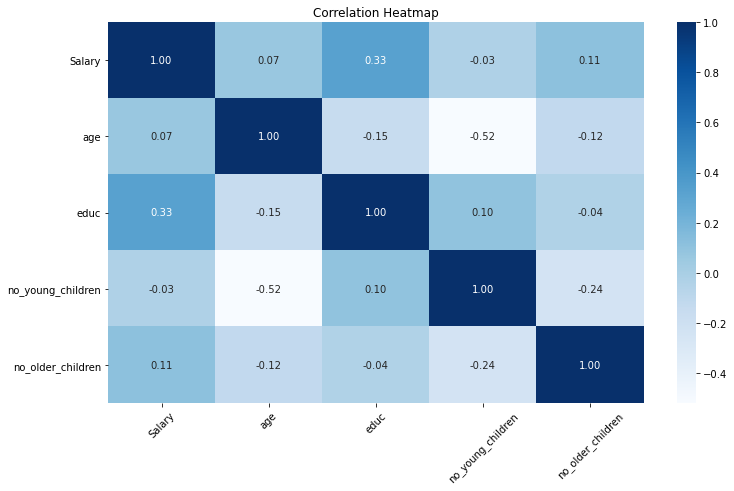

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(hp.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

As stated earlier, we do not see any strong correlation among the independent variables which is a good sign for regression. We can only see a strong inverse relation between age and no_young_children. 

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## Encoding Categorical Variables

In [28]:
# Converting Categorical to Numerical Variable
for feature in hp.columns: 
    if hp[feature].dtype == 'object':
        hp[feature] = pd.Categorical(hp[feature]).codes 

In [31]:
hp.head()

,Holiday_package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


## Train-Test Split

In [32]:
# Copy all the predictor variables into X dataframe
X = hp.drop('Holiday_package', axis=1)

# Copy target into the y dataframe. 
y = hp[['Holiday_package']]

In [33]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [34]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [37]:
y_train.value_counts(normalize=True) 

Holiday_package
0                  0.534426
1                  0.465574
dtype: float64

In [38]:
y_test.value_counts(normalize=True) 

Holiday_package
0                  0.553435
1                  0.446565
dtype: float64

The proportion of class of interest and the other class is good enough and has a good balance to perform the analysis.

In [39]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   21.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

## Predicting on Training and Test dataset

In [40]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [41]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.760399,0.239601
1,0.273260,0.726740
2,0.902624,0.097376
3,0.978140,0.021860
4,0.513226,0.486774


## Model Evaluation

In [42]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6786885245901639

In [44]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

Training score is 0.6786885245901639 whereas Testing score is 0.6374045801526718

## AUC and ROC for the training data

AUC: 0.743


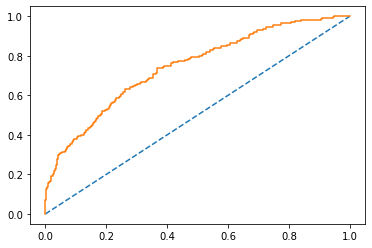

In [43]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.743


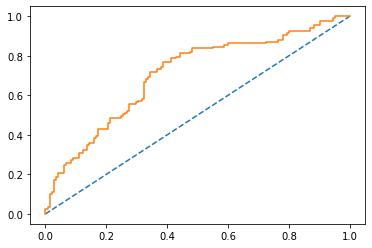

In [45]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC and ROC scores are same for training dataset and testing dataset at 74.3%

## Confusion Matrix for the training data

In [46]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

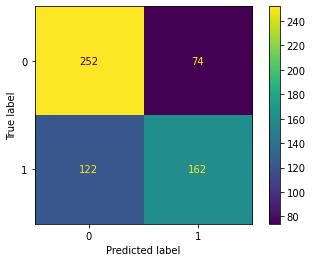

In [47]:
plot_confusion_matrix(model,X_train,y_train);

In [48]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



## Confusion Matrix for the testing data

In [49]:
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]], dtype=int64)

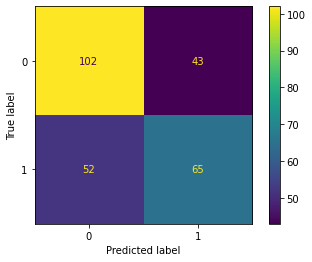

In [50]:
plot_confusion_matrix(model,X_test,y_test);

In [51]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



## Implementing the model

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
glm=logit_model.fit()
print(glm.summary())

Optimization terminated successfully.
         Current function value: 0.612003
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Holiday_package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:                  0.1129
Time:                        10:25:15   Log-Likelihood:                -533.67
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.337e-27
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Salary            -1.584e-05   4.07e-06     -3.896      0.000   -2.38e-05   -7.87e-06
age     

The model converges after 5 iterations. The model is significant with model deviance as below

DN = −2( log 𝐿𝑁 - log 𝐿𝐺) = −2(-601.61 – (-533.67))=1203.22 – 1067.34 = 135.88.25 on 5 df. 

Also, no_older_children is not significant as it is > alpha 0.05

## LDA Model

In [55]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [56]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [58]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6721311475409836

In [59]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6412213740458015

## Training Data and Test Data Confusion Matrix Comparison

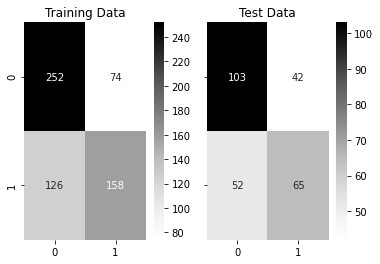

In [60]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


## Training Data and Test Data Classification Report Comparison

In [62]:
print('Classification Report of the training data as per LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data as per LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data as per LDA:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data as per LDA:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



## Probability prediction for the training and test data

In [63]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [64]:
pred_prob_train[:,1]

array([0.24451841, 0.74473838, 0.02926233, 0.33696244, 0.53643674,
       0.77166141, 0.42537442, 0.29503123, 0.22447685, 0.30070348,
       0.28534521, 0.25472358, 0.36253223, 0.49555106, 0.43238182,
       0.76289172, 0.76180657, 0.13440254, 0.43765202, 0.8874783 ,
       0.70795813, 0.17152298, 0.21548115, 0.63053721, 0.2367007 ,
       0.32348888, 0.64312884, 0.32722211, 0.85239686, 0.28937042,
       0.70512591, 0.80009771, 0.52040802, 0.27686374, 0.3164615 ,
       0.54760845, 0.52040327, 0.31517416, 0.44152214, 0.06906226,
       0.34406846, 0.54935353, 0.29231453, 0.88221405, 0.07678677,
       0.76222865, 0.68956941, 0.1184114 , 0.06581715, 0.55511382,
       0.47496466, 0.24377183, 0.66339382, 0.45779134, 0.89305876,
       0.44876138, 0.65167779, 0.2604166 , 0.68041423, 0.33655869,
       0.3568944 , 0.25495093, 0.18266474, 0.11733085, 0.30783826,
       0.36037879, 0.54026683, 0.58991236, 0.06395937, 0.59328948,
       0.63404283, 0.23717375, 0.38986934, 0.78549853, 0.37122

AUC for the Training Data: 0.742
AUC for the Test Data: 0.703


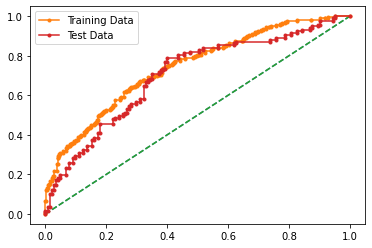

In [65]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()